This is an experiment using yfinance

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

stock_symbols = ["AAPL", "GOOGL", "MSFT"]
results_df = pd.DataFrame(columns=["Stock", "Date", "Volume", "Rolling Average"])

for symbol in stock_symbols:
    stock_data = yf.download(symbol, start="2022-01-01", end="2022-12-31")
    window_size = 20
    stock_data["Rolling Average"] = stock_data["Volume"].rolling(window_size).mean()
    threshold = 2.0
    spikes = stock_data[stock_data["Volume"] > threshold * stock_data["Rolling Average"]]
    
    if not spikes.empty:
        spikes["Stock"] = symbol
        spikes = spikes.reset_index()  # Reset index to make "Date" a column
        results_df = results_df.append(spikes[["Stock", "Date", "Volume", "Rolling Average"]])

# Print the results DataFrame
print(results_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


C:\Users\rafvr\AppData\Local\Temp\ipykernel_23444\4264238735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikes["Stock"] = symbol
C:\Users\rafvr\AppData\Local\Temp\ipykernel_23444\4264238735.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(spikes[["Stock", "Date", "Volume", "Rolling Average"]])
C:\Users\rafvr\AppData\Local\Temp\ipykernel_23444\4264238735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#re

[*********************100%***********************]  1 of 1 completed
   Stock       Date     Volume  Rolling Average
0   AAPL 2022-12-16  160156900       76358625.0
0  GOOGL 2022-02-02  123200000       45100200.0
1  GOOGL 2022-04-26   73054000       33474900.0
2  GOOGL 2022-04-27   91820000       36350000.0
3  GOOGL 2022-10-26   88114100       30469690.0
4  GOOGL 2022-12-16   58011800       28988910.0
0   MSFT 2022-04-27   63477700       30910430.0
1   MSFT 2022-10-26   82543200       31248725.0
2   MSFT 2022-12-16   86102000       28990960.0


C:\Users\rafvr\AppData\Local\Temp\ipykernel_23444\4264238735.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikes["Stock"] = symbol
C:\Users\rafvr\AppData\Local\Temp\ipykernel_23444\4264238735.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(spikes[["Stock", "Date", "Volume", "Rolling Average"]])


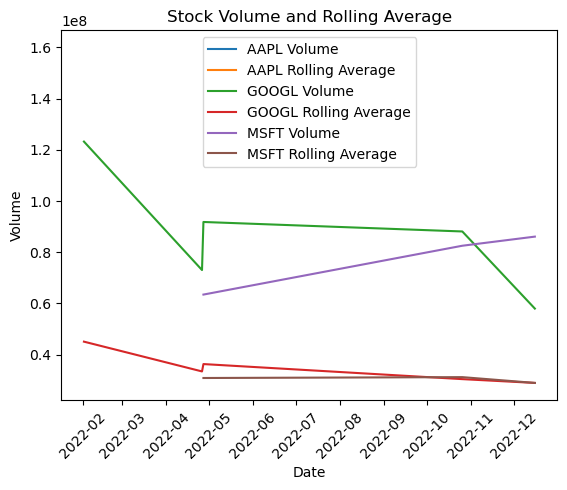

In [2]:
# Group the data by stock symbol
grouped_data = results_df.groupby("Stock")

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the data for each stock
for symbol, data in grouped_data:
    ax.plot(data["Date"], data["Volume"], label=f"{symbol} Volume")
    ax.plot(data["Date"], data["Rolling Average"], label=f"{symbol} Rolling Average")

# Set labels and title
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.set_title("Stock Volume and Rolling Average")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend with stock symbols and corresponding colors
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc="best")

# Display the plot
plt.show()